In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# faz a leitura do ficheiro de dados localizado no github

url = 'https://raw.githubusercontent.com/Miguel-Salgado/covid-19/master/casos-confirmados-de-cov.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head(40)


,Dia,Confirmados
0,60,0
1,61,2
2,62,4
3,63,6
4,64,9
5,65,13
6,66,21
7,67,30
8,68,39
9,69,41


In [3]:
# define a função logística usada no modelo

def logistic_model(x,a,b,c):
    return c/(np.exp((b-x)/a)+1)


In [4]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])

# utiliza curve_fit para fazer o ajuste dos dados, calculando os parâmetros a,b,c

fit_logistic = curve_fit(logistic_model,x,y,p0=[3,80,2100])

param_a = fit_logistic[0][0]
param_b = fit_logistic[0][1]
param_c = fit_logistic[0][2]

print("a = % 5.2f; b = % 5.2f; c = % 5.2f" %(param_a, param_b, param_c))

a =  4.20; b =  89.72; c =  14446.82


In [6]:
# calcula o erro associado ao ajuste efetuado 

errors_logistic = [np.sqrt(fit_logistic[1][i][i]) for i in [0,1,2]]
y_pred_logistic = [logistic_model(i,param_a,param_b,param_c) for i in x]


In [7]:
# calcula a data final da infeção resolvendo a equação associada ao modelo

sol_logistic = int(fsolve(lambda x : logistic_model(x,param_a,param_b,param_c) - int(param_c),param_b))
end_date_logistic = datetime(2020, 1, 1) + timedelta(days=sol_logistic)


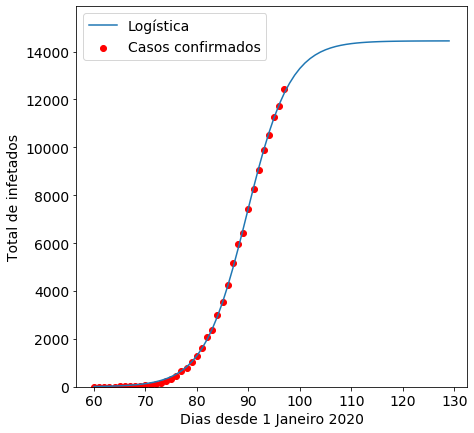

Previsão de casos confirmados para amanhã: 12677 indivíduos
Previsão do número total de infetados: 14446 +/- 165 indivíduos
Previsão do final da infeção: 10/5/2020
Erro quadrado médio do ajuste: 6883


In [8]:
# constrói o gráfico e mostra os resultados das predições

pred_x_logistic = list(range(max(x),sol_logistic))

plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

# Real data
plt.scatter(x,y,label="Casos confirmados",color="red")

# Predicted logistic curve
plt.plot(x+pred_x_logistic, [logistic_model(i,param_a,param_b,param_c) for i in x+pred_x_logistic], label="Logística" )

plt.legend()
plt.xlabel("Dias desde 1 Janeiro 2020")
plt.ylabel("Total de infetados")
plt.ylim((min(y)*0.9,param_c*1.1))
plt.show()

# print previsões
print("Previsão de casos confirmados para amanhã: %d indivíduos" %(logistic_model(max(x)+1,param_a,param_b,param_c)))
print("Previsão do número total de infetados: %2d +/- %2d indivíduos" %(param_c, errors_logistic[2]))
print("Previsão do final da infeção: %d/%d/%d" %(end_date_logistic.day, end_date_logistic.month, end_date_logistic.year))
print("Erro quadrado médio do ajuste: %1d" %mean_squared_error(y,y_pred_logistic))
